## 1. Lectura y análisis exploratorio de datos

In [51]:
#Importamos las Librerias necesarias
import numpy as np
import pandas as pd

In [52]:
#Cargamos los datos
df = pd.read_csv('ejemplo_data.csv')

In [53]:
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,n


In [54]:
#Exploramos los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      object
 6   fecha        6 non-null      object
 7   Activo       6 non-null      object
dtypes: int64(1), object(7)
memory usage: 512.0+ bytes


Podemos ver que todas nuestras columnas, a excepción de ID (Entero), son objetos 

In [55]:
#Transformamos a valores numericos la columna activo para despues pasarla a booleana
df.Activo=pd.to_numeric(df.Activo, errors='coerce')
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1.0
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0.0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1.0
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1.0
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0.0
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,NaN


In [56]:
#Rellenamos los datos faltantes con 0 y luego transformamos usanto astype 
df['Activo']=df.Activo.fillna(0)
df['Activo']=df['Activo'].astype('bool')
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,True
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,False
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,True
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,True
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,False
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,False


In [57]:
df.Unidades=pd.to_numeric(df.Unidades,errors='coerce')
df['Unidades']= df['Unidades'].fillna(df['Unidades'].mean())
df.Unidades=df.Unidades.astype('int')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      int32 
 6   fecha        6 non-null      object
 7   Activo       6 non-null      bool  
dtypes: bool(1), int32(1), int64(1), object(5)
memory usage: 446.0+ bytes


In [59]:
df['2016']=df['2016'].replace(to_replace='[$,.,]',value='',regex=True) # Reemplazamos los simbolos $ , y . por un espacio vacio
df['2016']=df['2016'].astype('float') # transformamos la columna a flotante
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           6 non-null      int64  
 1   Nombre       6 non-null      object 
 2   2016         6 non-null      float64
 3   2017         6 non-null      object 
 4   Crecimiento  6 non-null      object 
 5   Unidades     6 non-null      int32  
 6   fecha        6 non-null      object 
 7   Activo       6 non-null      bool   
dtypes: bool(1), float64(1), int32(1), int64(1), object(4)
memory usage: 446.0+ bytes


## 2. Estadísticas descriptivas

Creamos un diccionario de distintas cervezas con su respectivo nivel de Alcohol e IBU.

In [60]:
#Creamos el diccionario

cervezas = {
    "Kunstmann Torobayo": {
        "Alcohol": 5,
        "IBU": 12,
        },
    "Kunstmann Lager": {
        "Alcohol": 4.3,
        "IBU": 16,
        },
    "Kunstmann Bock": {
        "Alcohol": 5.3,
        "IBU": 19,
        },
    "Kunstmann IPA": {
        "Alcohol": 5,
        "IBU": 50,
        },
    "Austral Lager": {
        "Alcohol": 4.6,
        "IBU": 16,
        },
    "Austral Torres del Paine": {
        "Alcohol": 6.1,
        "IBU": 21,
        },
    "+56 Stout": {
        "Alcohol": 7,
        "IBU": 30,
        },
    "+56 Pale Ale": {
        "Alcohol": 5,
        "IBU": 18,
        },
    "Cuello Negro Stout": {
        "Alcohol": 8,
        "IBU": 56,
        },
    "Cristal": {
        "Alcohol": 4.6,
        "IBU": 17,
        },
    "Becker": {
        "Alcohol": 4.5,
        "IBU": 14.5,
        },
    "Escudo": {
        "Alcohol": 5.5,
        "IBU": 19,
        },
    "Royal Guard": {
        "Alcohol": 5,
        "IBU": 19,
        },
     "Royal Guard IPA": {
        "Alcohol": 6.3,
        "IBU": 48,
        },
     "Guayacán Golden Ale": {
        "Alcohol": 4.5,
        "IBU": 24,
        },
     "Guayacán Stout": {
        "Alcohol": 6,
        "IBU": 16,
        },
    "Kross Golden": {
        "Alcohol": 5.3,
        "IBU": 25,
        },
    "Del Puerto Amber Ale": {
        "Alcohol": 4.5,
        "IBU": 18,
        },
    "Mestra Wood Beer": {
        "Alcohol": 7.0,
        "IBU": 10.3,
        },
    "Mestra Scotch Ale": {
        "Alcohol": 6.5,
        "IBU": 10.8,
        },
}



In [61]:
df_cervezas = pd.DataFrame([key for key in cervezas.keys()], columns=['Cerveza']) # creamos el dataframe solo con los nombres de las cervezas
df_cervezas['Alcohol'] = [value['Alcohol'] for value in cervezas.values()] # Usamos List Comprehension para crear las columnas de manera mas facil
df_cervezas['IBU'] = [value['IBU'] for value in cervezas.values()]
df_cervezas

,Cerveza,Alcohol,IBU
0,Kunstmann Torobayo,5.0,12.0
1,Kunstmann Lager,4.3,16.0
2,Kunstmann Bock,5.3,19.0
3,Kunstmann IPA,5.0,50.0
4,Austral Lager,4.6,16.0
5,Austral Torres del Paine,6.1,21.0
6,+56 Stout,7.0,30.0
7,+56 Pale Ale,5.0,18.0
8,Cuello Negro Stout,8.0,56.0
9,Cristal,4.6,17.0


In [62]:
#Usamos el atributo describe, el cual nos entrega algunas medidas centrales y de dispersión.
df_cervezas.describe()

,Alcohol,IBU
count,20.000000,20.000000
mean,5.500000,22.980000
std,1.029563,13.149689
min,4.300000,10.300000
25%,4.600000,16.000000
50%,5.150000,18.500000
75%,6.150000,24.250000
max,8.000000,56.000000


Notamos que la media de alcohol es 5.5 y la de IBU es 22.98  
la mediana del acohol es 5.15 y la de IBU es 18.5.   
El metodo describe no nos entrega la moda, así que usaremos el atributo mode() para hacerlo

In [63]:
df_cervezas["IBU"].mode()

0    16.0
1    19.0
dtype: float64

In [64]:
df_cervezas["Alcohol"].mode()

0    5.0
dtype: float64

Así podemos ver que la moda de IBU son 16 y 19, y la del alcohol es 5

In [65]:
df_cervezas.var()

C:\Users\iaace\AppData\Local\Temp/ipykernel_18928/3924243719.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cervezas.var()


Alcohol      1.060000
IBU        172.914316
dtype: float64

<AxesSubplot:>

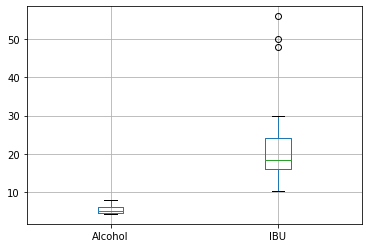

In [66]:
df_cervezas.boxplot()

<AxesSubplot:xlabel='Alcohol', ylabel='IBU'>

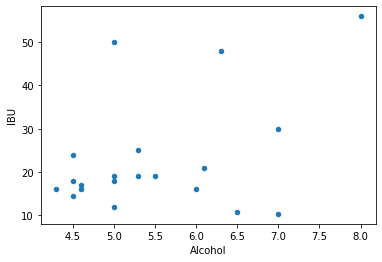

In [67]:
df_cervezas.plot.scatter(x='Alcohol',y='IBU')

array([[<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'IBU'}>]], dtype=object)

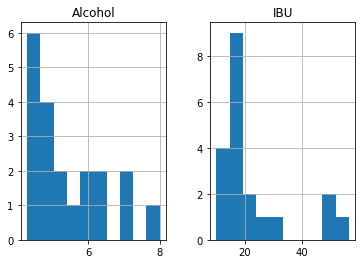

In [68]:
df_cervezas.hist()

In [69]:
df_cervezas.corr()

,Alcohol,IBU
Alcohol,1.00000,0.41422
IBU,0.41422,1.00000


In [70]:
df_cervezas.cov()

,Alcohol,IBU
Alcohol,1.060000,5.607895
IBU,5.607895,172.914316


## 3. Transformación e imputación de datos

In [71]:
df2 = pd.read_csv('ejemplo_data2.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [72]:
df2.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [73]:
#Notamos que la columna CouncilArea es categorica, por ende la transformaremos a numerica para poder trajabar
from sklearn.preprocessing import LabelEncoder
labelenconder_council = LabelEncoder()
df2['CouncilArea']=labelenconder_council.fit_transform(df2['CouncilArea'])

In [74]:
#Usamos el metodo SimpleImputer para reemplazar facilmente los valores faltantes por la media 
from sklearn.impute import SimpleImputer 
df2_na=df2.iloc[:,[12,14,15,16]]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
fit_df2_na = imputer.fit(df2_na) 
df2.iloc[:,[12,14,15,16]] = fit_df2_na.transform(df2_na)

In [75]:
for i in [0,1,3,5,6,7,19]:
    labelenconder_cat = LabelEncoder()
    categ = df2.iloc[:,i]
    df2.iloc[:,i]=labelenconder_cat.fit_transform(categ)
    

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  int32  
 1   Address        13580 non-null  int32  
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  int32  
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  int32  
 6   SellerG        13580 non-null  int32  
 7   Date           13580 non-null  int32  
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  float64
 17  Lattitude      13580 non-null  float64
 18  Longti

In [77]:
df2.isnull().sum() # verificamos si aun quedan valores NaN's

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## 4. Visualización de datos

In [78]:
mean = np.random.rand(2)
cov = np.array([[1,0],[0,1]])
datos_1 = np.random.multivariate_normal(mean, cov, 100) 
datos_1 = np.hstack([datos_1, np.zeros((datos_1.shape[0],1))])

In [79]:
df_1 = pd.DataFrame(datos_1, columns=['x','y','z'])
df_1

,x,y,z
0,0.909484,-1.337857,0.0
1,0.874990,0.350847,0.0
2,0.331033,1.020437,0.0
3,1.027433,2.457460,0.0
4,0.465278,2.051790,0.0
...,...,...,...
95,0.339991,1.022084,0.0
96,-0.932728,0.406178,0.0
97,2.247627,0.699920,0.0
98,1.225083,0.810939,0.0


In [80]:
mean2 = np.random.rand(2)
cov2 = np.array([[1,0],[0,1]])
datos_2 = np.random.multivariate_normal(mean2, cov2, 100) 
datos_2 = np.hstack([datos_2, np.ones((datos_1.shape[0],1))])
df_2 = pd.DataFrame(datos_2, columns=['x','y','z'])

In [81]:
df_2

,x,y,z
0,-1.232705,1.913077,1.0
1,1.465023,-0.028579,1.0
2,0.197734,1.336773,1.0
3,0.608596,0.743783,1.0
4,0.600574,0.414979,1.0
...,...,...,...
95,-1.230634,0.959136,1.0
96,0.730033,2.634511,1.0
97,0.247753,0.997783,1.0
98,-1.321014,3.420754,1.0


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
datos = np.concatenate([datos_1,datos_2])
bd = pd.DataFrame(datos, columns=['x','y','z'])
bd

,x,y,z
0,0.909484,-1.337857,0.0
1,0.874990,0.350847,0.0
2,0.331033,1.020437,0.0
3,1.027433,2.457460,0.0
4,0.465278,2.051790,0.0
...,...,...,...
195,-1.230634,0.959136,1.0
196,0.730033,2.634511,1.0
197,0.247753,0.997783,1.0
198,-1.321014,3.420754,1.0


C:\Users\iaace\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

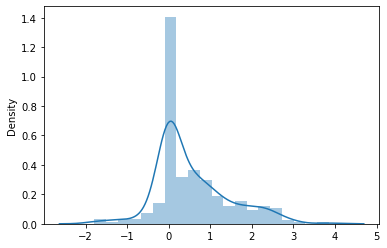

In [84]:
sns.distplot(df_1, bins=20, kde=True, rug=False)

C:\Users\iaace\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

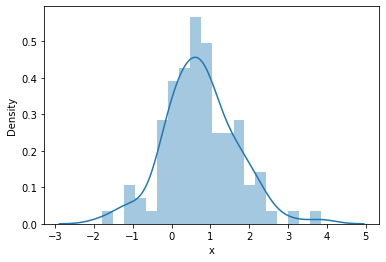

In [85]:
sns.distplot(df_1['x'], bins=20, kde=True, rug=False)

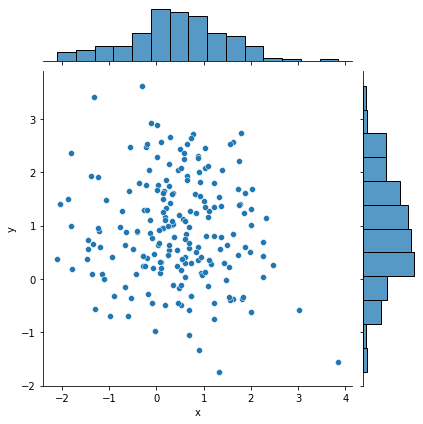

In [86]:
sns.jointplot(x = 'x', y = 'y', data = bd)

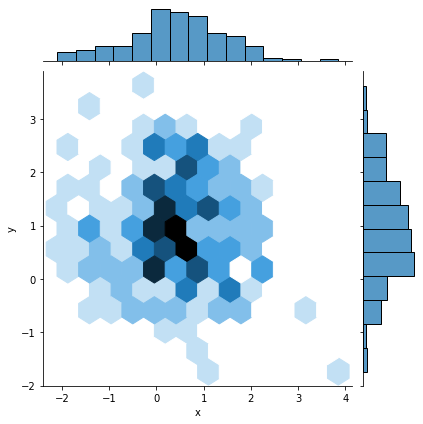

In [87]:
sns.jointplot(x = 'x', y = 'y', data = bd, kind='hex')

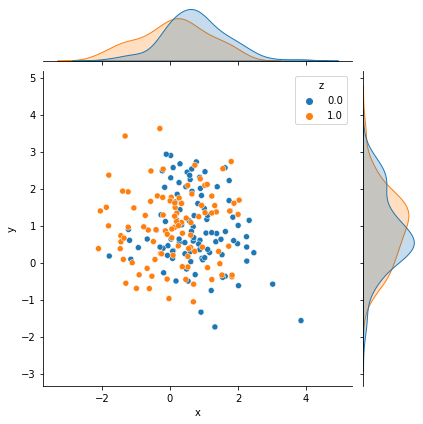

In [89]:
sns.jointplot(x = 'x', y = 'y', data = bd, hue='z')

<AxesSubplot:xlabel='x'>

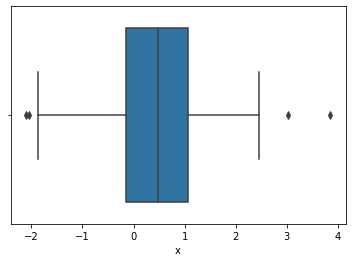

In [95]:
sns.boxplot(x = bd['x'], data=bd)

<AxesSubplot:xlabel='y'>

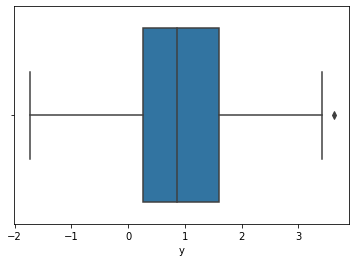

In [96]:
sns.boxplot(x = bd['y'], data=bd)

<AxesSubplot:>

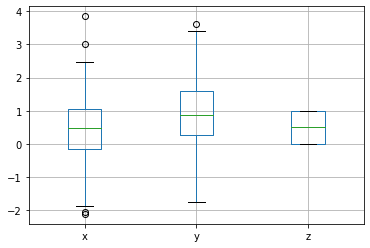

In [97]:
bd.boxplot()